In [2]:
import pandas as pd
import numpy as np
import re
import missingno as msno

import os
import glob

import platform
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [1]:
%pwd

'c:\\Users\\pc\\Desktop\\데이터스토리'

## 4. 서울시 주민등록인구 구별 통계
* https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

In [3]:
pd.read_excel('./data/서울시 구별 인구수/Report.xls') # 먼저 받아보고, 어떻게 받아와야 효율적일지 고민해보자

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2021.2/4,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
3,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
4,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
5,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
6,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591
7,2021.2/4,광진구,166957,355306,170624,184682,342481,165233,177248,12825,5391,7434,2.05,50815
8,2021.2/4,동대문구,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262
9,2021.2/4,중랑구,185073,394679,194556,200123,389972,192688,197284,4707,1868,2839,2.11,70172


In [4]:
df_gu = pd.read_excel('./data/서울시 구별 인구수/Report.xls', skiprows=[1,2,3])
df_gu

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
1,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
2,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
3,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591
4,2021.2/4,광진구,166957,355306,170624,184682,342481,165233,177248,12825,5391,7434,2.05,50815
5,2021.2/4,동대문구,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262
6,2021.2/4,중랑구,185073,394679,194556,200123,389972,192688,197284,4707,1868,2839,2.11,70172
7,2021.2/4,성북구,194364,443206,212849,230357,433658,209210,224448,9548,3639,5909,2.23,73568
8,2021.2/4,강북구,144525,306093,148824,157269,302645,147542,155103,3448,1282,2166,2.09,63383
9,2021.2/4,도봉구,138387,322419,156843,165576,320365,156080,164285,2054,763,1291,2.31,62894


In [5]:
df_seoul_gu = df_gu[['자치구', '인구']] #, '65세이상고령자']]
df_seoul_gu

,자치구,인구
0,종로구,155106
1,중구,132259
2,용산구,240665
3,성동구,295767
4,광진구,355306
5,동대문구,352259
6,중랑구,394679
7,성북구,443206
8,강북구,306093
9,도봉구,322419


In [6]:
df_seoul_gu.columns = ['시군구명', '인구수'] #, '고령자수']
df_seoul_gu

,시군구명,인구수
0,종로구,155106
1,중구,132259
2,용산구,240665
3,성동구,295767
4,광진구,355306
5,동대문구,352259
6,중랑구,394679
7,성북구,443206
8,강북구,306093
9,도봉구,322419


In [7]:
df_seoul_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구명    25 non-null     object
 1   인구수     25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [22]:
# df_seoul_gu['인구수'] = pd.to_numeric(df_seoul_gu['인구수'])

In [8]:
df_seoul_gu = df_seoul_gu.set_index('시군구명', drop=True) # 시각화를 위해 시군구명을 인덱스로 내린다
df_seoul_gu 

,인구수
시군구명,
종로구,155106
중구,132259
용산구,240665
성동구,295767
광진구,355306
동대문구,352259
중랑구,394679
성북구,443206
강북구,306093


In [9]:
df_seoul_gu.sort_values(by='인구수', ascending=False)

,인구수
시군구명,
송파구,664341
강서구,582995
강남구,536107
노원구,520005
관악구,502698
은평구,479409
강동구,469094
양천구,454288
성북구,443206


## 이후 연계분석 위해 '서울시 구별 인구수' 데이터프레임으로 저장

In [25]:
df_seoul_gu.to_csv('./data/df_seoul_gu.csv')

### 다양한 컬러 옵션을 줄 수 있다
* https://matplotlib.org/stable/gallery/color/named_colors.html 

Text(0.5, 1.0, '서울시 구별 인구수 순위')

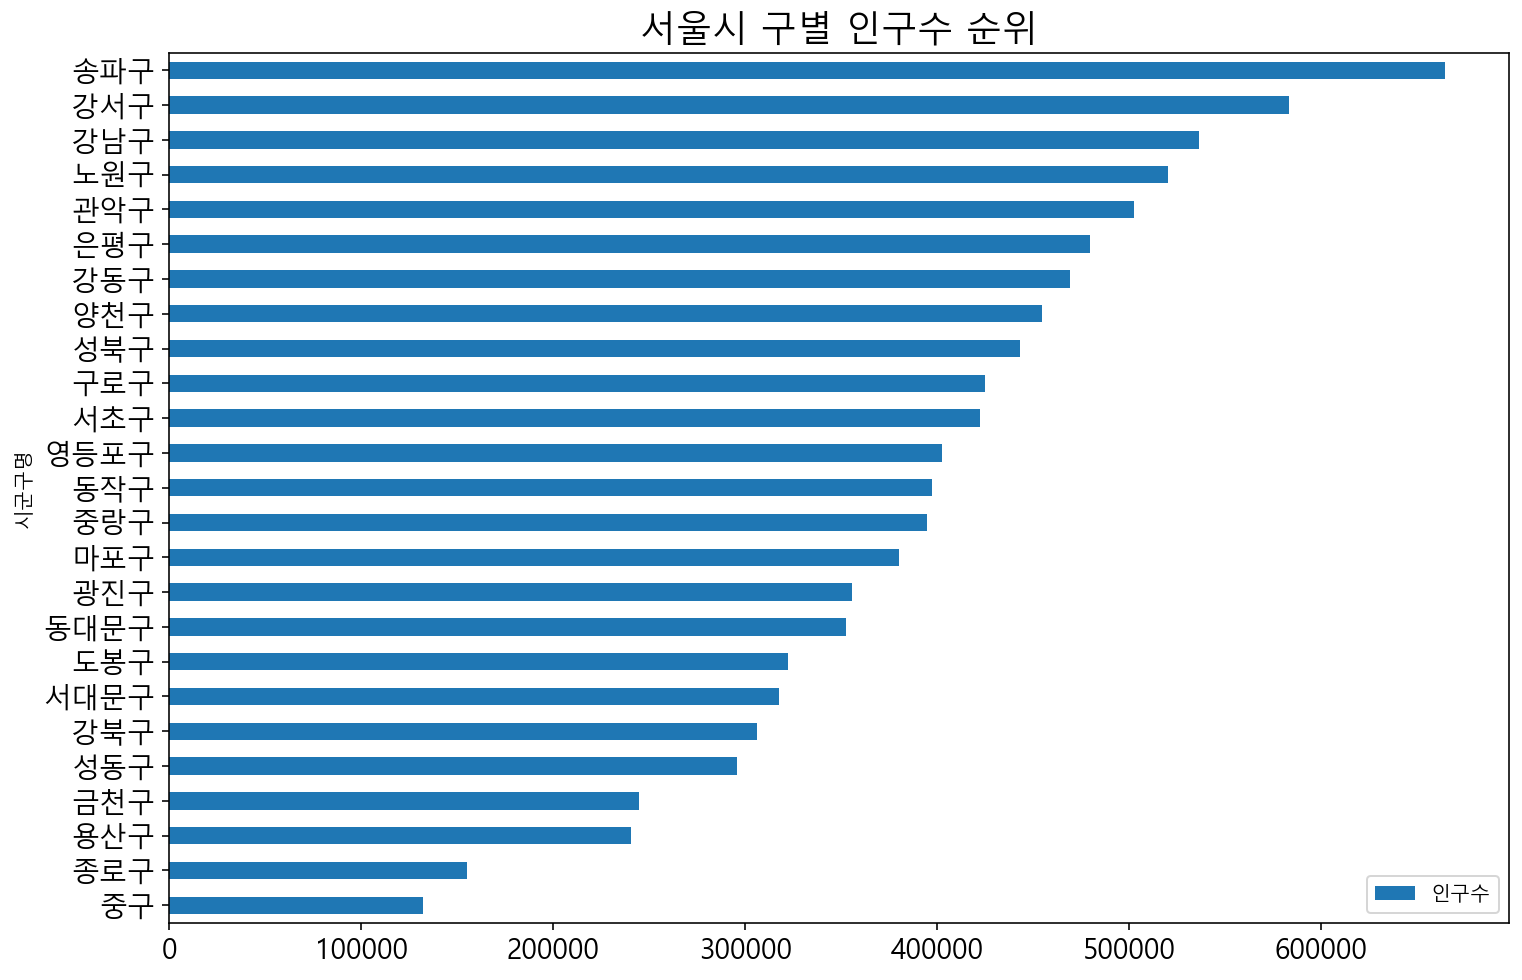

In [10]:
df_seoul_gu.sort_values(by='인구수').plot(kind='barh', color='tab:blue', figsize=(12,8), fontsize=14) 
plt.title('서울시 구별 인구수 순위', fontsize=18)

## folium 활용한 <인구수> 지도 choropleth 시각화
* 구별로 인구수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : [southkorea/seoul-maps: Seoul administrative divisions in ESRI Shapefile, GeoJSON and TopoJSON formats.](https://github.com/southkorea/seoul-maps)

In [65]:
import folium
import json

geo_path = './data/skorea_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

In [66]:
# 지도 그리기 위해 앞에서 처리한 서울시 상권 위도, 경도 데이터 로딩
df_shop_seoul = pd.read_csv('./data/df_shop_seoul.csv')
df_shop_seoul.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,지번주소,도로명주소,경도,위도
0,비지트,NaN,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길 82,126.991394,37.488375
1,쓰리에프,NaN,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길 12,126.980952,37.487105
2,채움,NaN,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로 81,126.981794,37.572387
3,호구의주방,NaN,소매,가정/주방/인테리어,주방가구판매,서울특별시,영등포구,양평2동,양평동4가,서울특별시 영등포구 양평동4가 160-2,서울특별시 영등포구 선유로 269,126.897892,37.536700
4,다향,NaN,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로 230,127.009382,37.483436


In [74]:
# https://python-visualization.github.io/folium/quickstart.html
# https://matplotlib.org/stable/gallery/color/colormap_reference.html

map = folium.Map(location=[df_shop_seoul['위도'].mean(), df_shop_seoul['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = geo_json,
               data = df_seoul_gu['인구수'],
               columns = [df_shop_seoul.index, df_seoul_gu['인구수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)
map

## 구별 인구수, 음식점수, 쓰레기 배출량과 코로나 발생의 상관관계 (학습용)
* 인구수, 음식점수, 쓰레기 배출량, 코로나 확진 측정 시기와 기준이 다릅니다 (통계 자료)
* 실제로 상관관계를 보려면 기준/기간을 동일하게 하여 측정한 데이터를 사용해야 합니다
* 여기에서는 "학습" 차원에서, 여러 데이터를 합쳐 변수간 상관관계를 살펴보는 방법을 실습합니다

In [11]:
# 앞에서 처리한 서울시 구별 음식점 수 csv 데이터 로딩
df_food_seoul = pd.read_csv('./data/df_food_seoul.csv')
df_food_seoul.head()

,시군구명,음식점수
0,강남구,12723
1,마포구,7684
2,송파구,7348
3,서초구,6610
4,강서구,6393


In [12]:
# 앞에서 처리한 서울시 구별 쓰레기 배출량 csv 데이터 로딩
df_garbage_seoul = pd.read_csv('./data/df_garbage_seoul.csv')
df_garbage_seoul.head()

,시군구명,배출량
0,송파구,38265512065
1,도봉구,34790954457
2,노원구,32942231384
3,마포구,20825545358
4,영등포구,18647711639


In [13]:
# 미리 합쳐놓은 데이터프레임 사용
df_food_garbage_corona = pd.read_csv('./data/df_food_garbage_corona.csv')
df_food_garbage_corona.head()

,시군구명,음식점수,배출량,확진자수
0,강남구,12723,1418405631,7146
1,마포구,7684,20825545358,3889
2,송파구,7348,38265512065,6606
3,서초구,6610,9714324358,4380
4,강서구,6393,7844540723,4627


In [14]:
df_seoul_gu

,인구수
시군구명,
종로구,155106
중구,132259
용산구,240665
성동구,295767
광진구,355306
동대문구,352259
중랑구,394679
성북구,443206
강북구,306093


In [15]:
df_food_garbage_corona

,시군구명,음식점수,배출량,확진자수
0,강남구,12723,1418405631,7146
1,마포구,7684,20825545358,3889
2,송파구,7348,38265512065,6606
3,서초구,6610,9714324358,4380
4,강서구,6393,7844540723,4627
5,영등포구,6389,18647711639,4654
6,관악구,5387,4566695953,5580
7,강동구,5181,14253903549,4000
8,종로구,5158,2390357650,1745
9,중구,4869,4395584448,1824


In [16]:
df_seoul_gu.reset_index(inplace=True) # 조인을 위해 인덱스를 데이터프레임의 컬럼으로 올려준다

In [17]:
df_pop_food_garbage_corona = pd.merge(df_seoul_gu, df_food_garbage_corona)
df_pop_food_garbage_corona.head()

,시군구명,인구수,음식점수,배출량,확진자수
0,종로구,155106,5158,2390357650,1745
1,중구,132259,4869,4395584448,1824
2,용산구,240665,4583,220185394,2814
3,성동구,295767,3917,9915469267,2961
4,광진구,355306,4569,5490445600,3633


In [34]:
df_pop_food_garbage_corona.describe()

,인구수,음식점수,배출량,확진자수
count,25.000000,25.000000,2.500000e+01,25.000000
mean,391817.040000,5048.120000,1.131163e+10,3865.600000
std,125915.847806,2064.582349,1.041689e+10,1303.178166
min,132259.000000,2690.000000,2.201854e+08,1745.000000
25%,317699.000000,3917.000000,4.395584e+09,2814.000000
50%,397231.000000,4583.000000,8.487977e+09,3889.000000
75%,469094.000000,5387.000000,1.217723e+10,4449.000000
max,664341.000000,12723.000000,3.826551e+10,7146.000000


Text(0.5, 1.03, '구별 인구, 음식점수, 음식물 쓰레기 양, 코로나 확진자수의 관계')

<Figure size 1008x576 with 0 Axes>

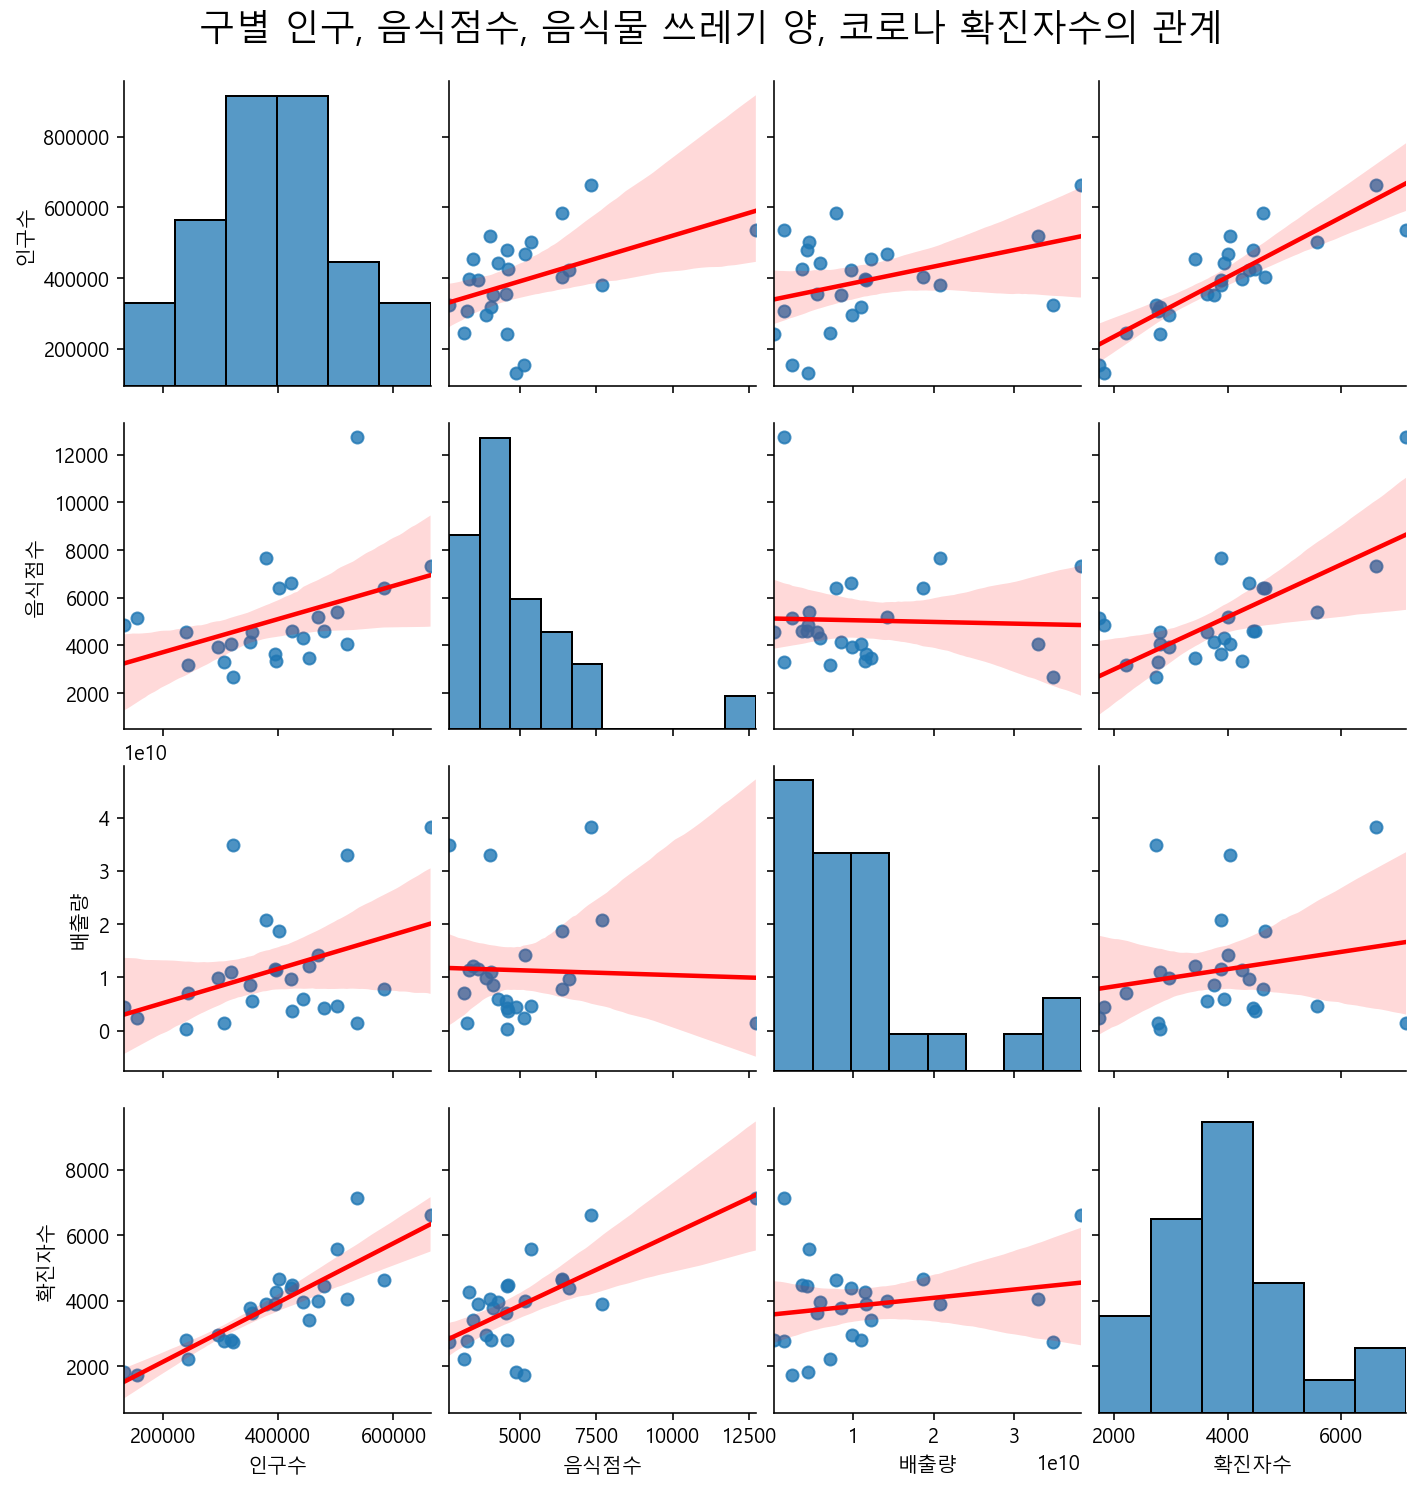

In [31]:
plt.figure(figsize = (14,8))
g = sns.pairplot(df_pop_food_garbage_corona, kind='reg', plot_kws={'line_kws':{'color':'red'}})
g.fig.suptitle('구별 인구, 음식점수, 음식물 쓰레기 양, 코로나 확진자수의 관계', y=1.03, fontsize=18) 

In [36]:
df_pop_food_garbage_corona.corr()

,인구수,음식점수,배출량,확진자수
인구수,1.000000,0.424563,0.388794,0.874852
음식점수,0.424563,1.000000,-0.036131,0.693609
배출량,0.388794,-0.036131,1.000000,0.203059
확진자수,0.874852,0.693609,0.203059,1.000000


Text(0.5, 1.03, '인구수, 음식점 수, 음식물 쓰레기 양, 코로나 확진자수의 상관관계')

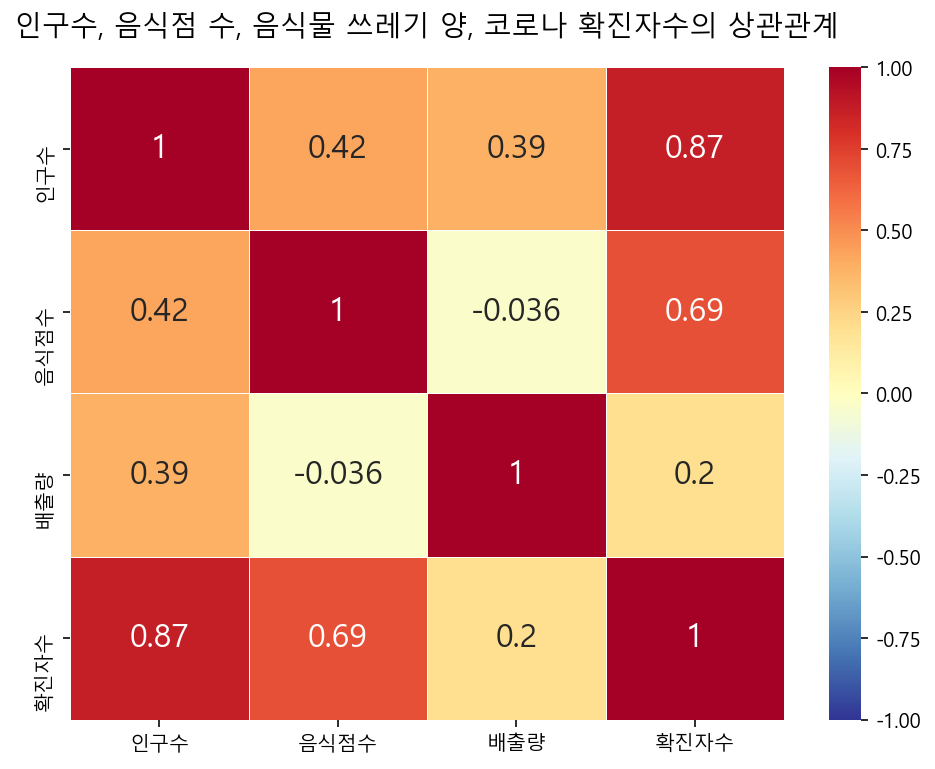

In [30]:
# https://m.blog.naver.com/kiddwannabe/221763497317

plt.figure(figsize = (8, 6))
sns.heatmap(df_pop_food_garbage_corona.corr(), 
            annot = True,      
            cmap = 'RdYlBu_r',
            linewidths=.5, 
            vmin = -1, vmax = 1, 
            annot_kws={"size": 16}
            )
plt.title('인구수, 음식점 수, 음식물 쓰레기 양, 코로나 확진자수의 상관관계', y=1.03, fontsize=14)

<AxesSubplot:>

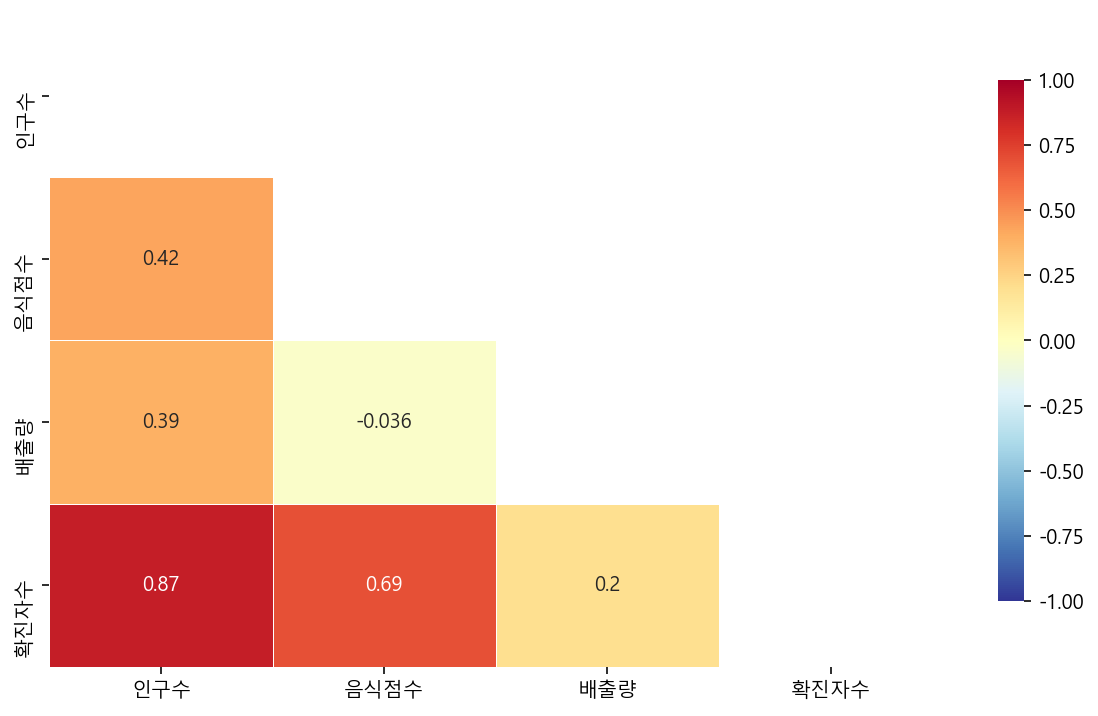

In [38]:
# https://m.blog.naver.com/kiddwannabe/221763497317

mask = np.zeros_like(df_pop_food_garbage_corona.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,6))

sns.heatmap(df_pop_food_garbage_corona.corr(), 
            annot = True,  
            mask = mask,   
            cmap = 'RdYlBu_r',  
            linewidths=.5, 
            cbar_kws={"shrink": .8},
            vmin = -1, vmax = 1, 
            )